In [68]:
import spacy
import spacy_transformers
import networkx as nx
import stanza
import spacy_stanza

### Shortest path with spacy

In [132]:
nlp = spacy_stanza.load_pipeline("en")

In [175]:
nlp = spacy.load("en_core_web_trf", disable=["textcat"])

In [258]:
# https://spacy.io/docs/usage/processing-text
# sentence = 'Robots in popular culture are there to remind us of the awesomeness of unbound human agency.'
# sentence = "Amsterdam is the capital and largest city in the European country of the Netherlands."
# sentence = "Amsterdam is refered to as the 'Venice of the North'."
# sentence = "Located in North-Holland, Amsterdam is the capital of the Netherlands."
sentence = "The city hosts two universities (A and B) and an international airport 'C' built in 1923."
# sentence = "Winehouse effortlessly performed her song Rehab"
# sentence = "Google will join Meta and Amazon."
# sentence = "Elon Musk founded Tesla and Bill Gates founded Microsoft."
# sentence = "Google joined other tech compnaies like Msoft and Ama."
# sentence = "Michael is a parent of James."

document = nlp(sentence)

print(document)


edges = []
for token in document:
    for child in token.children:
        edges.append((token, child))

graph = nx.Graph(edges)

The city hosts two universities (A and B) and an international airport 'C' built in 1923.


In [259]:
for token in document:
    print(f"{token.text:12} {token.pos_:10} {token.tag_:10} {token.dep_:10}")

The          DET        DT         det       
city         NOUN       NN         nsubj     
hosts        VERB       VBZ        ROOT      
two          NUM        CD         nummod    
universities NOUN       NNS        dobj      
(            PUNCT      -LRB-      punct     
A            NOUN       NN         appos     
and          CCONJ      CC         cc        
B            NOUN       NN         conj      
)            PUNCT      -RRB-      punct     
and          CCONJ      CC         cc        
an           DET        DT         det       
international ADJ        JJ         amod      
airport      NOUN       NN         nmod      
'            PUNCT      ``         punct     
C            NOUN       NN         conj      
'            PUNCT      ''         punct     
built        VERB       VBN        acl       
in           ADP        IN         prep      
1923         NUM        CD         pobj      
.            PUNCT      .          punct     


In [260]:
edges

[(city, The),
 (hosts, city),
 (hosts, universities),
 (hosts, .),
 (universities, two),
 (universities, (),
 (universities, A),
 (universities, )),
 (universities, and),
 (universities, C),
 (A, and),
 (A, B),
 (airport, international),
 (C, an),
 (C, airport),
 (C, '),
 (C, '),
 (C, built),
 (built, in),
 (in, 1923)]

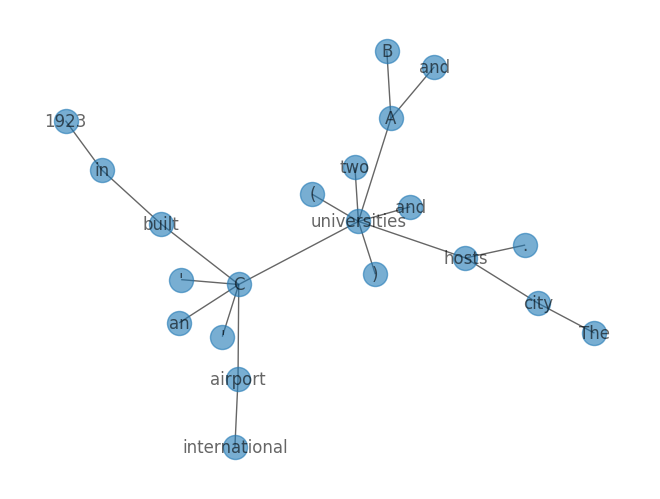

In [261]:
nx.draw(graph, with_labels = True, alpha=0.6, )

In [262]:
no_pos = {"AUX", "DET",}
no_dep = {"dobj"}

In [263]:
path = nx.shortest_path(graph, source=document[1], target=document[8])
print(path)
path = [t for t in path[1:-1] if t.pos_ not in nono and not t.ent_type and t.dep_ not in no_dep]
print(path)

[city, hosts, universities, A, B]
[hosts, A]


### Shortest path with StanfordNLP

In [3]:
import stanza

# stanza.download('en')
nlp = stanza.Pipeline('en', verbose=False)

In [174]:
# sentence = 'Convulsions that occur after DTaP are caused by a fever.'
# sentence = "Amsterdam is the capital and largest city in the European country of the Netherlands."
# sentence = "Winehouse effortlessly performed her song Rehab"
# sentence = "Google will join Meta and Amazon."
sentence = "Amsterdam is refered to as the 'Venice of the North'."


doc = nlp(sentence)
print(*[f'id: {word.id}\tword: {word.text:5}\thead id: {word.head}\thead: {sent.words[word.head-1].text if word.head > 0 else "root"}\tdeprel: {word.deprel}' for sent in doc.sentences for word in sent.words], sep='\n')

print()
print(*[f'entity: {ent.text:12}\ttype: {ent.type}' for ent in doc.ents], sep='\n')

# Load stanfordnlp's dependency tree into a networkx graph
edges = []
for token in doc.sentences[0].dependencies:
    if token[0].text.lower() != 'root':
#         edges.append((token[0].text.lower(), token[2].text.lower()))
        edges.append((f"{token[0].text.lower()}-{token[0].id}", f"{token[2].text.lower()}-{token[2].id}"))
graph = nx.Graph(edges)

AttributeError: 'spacy.tokens.doc.Doc' object has no attribute 'sentences'

In [22]:
for x,y in edges:
    print(x,y)

refered-3 amsterdam-1
refered-3 is-2
refered-3 to-4
venice-7 as-5
venice-7 the-6
refered-3 venice-7
refered-3 .-8


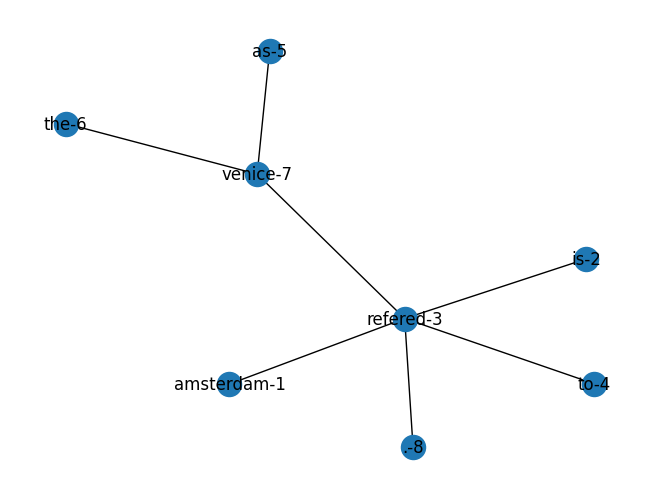

In [23]:
nx.draw(graph, with_labels=True)

In [26]:
# Get the length and path
entity1 = 'amsterdam-1'.lower()
entity2 = 'venice-7'.lower()
print(nx.shortest_path_length(graph, source=entity1, target=entity2))
print(nx.shortest_path(graph, source=entity1, target=entity2))

2
['amsterdam-1', 'refered-3', 'venice-7']


### Shortest path with Annotator

In [18]:
import re
import networkx as nx
from pntl.tools import Annotator

In [20]:
annotator = Annotator()
text = """Robots in popular culture are there to remind us of the awesomeness of unbound human agency."""
dep_parse = annotator.get_annoations(text, dep_parse=True)['dep_parse']

# dp_list = dep_parse.split('\n')
# pattern = re.compile(r'.+?\((.+?), (.+?)\)')
# edges = []
# for dep in dp_list:
#     m = pattern.search(dep)
#     edges.append((m.group(1), m.group(2)))

****************************************************************************************************
default values:
senna path:
  
Dependencie parser:
 /Users/jeewon/Library/Python/3.8/lib/python/site-packages/pntl/
Stanford parser clr java -cp stanford-parser.jar edu.stanford.nlp.trees.EnglishGrammaticalStructure -treeFile in.parse -collapsed
****************************************************************************************************


FileNotFoundError: [Errno 2] No such file or directory: ''

### (not part of shortest path) - using babel library

In [170]:
import spacy_component

nlp = spacy.load("en_core_web_sm")

nlp.add_pipe("rebel", after="senter", config={
    'device':-1, # Number of the GPU, -1 if want to use CPU
    'model_name':'Babelscape/rebel-large'} # Model used, will default to 'Babelscape/rebel-large' if not given
)

# input_sentence = "Gràcia is a district of the city of Barcelona, Spain. It comprises the neighborhoods of Vila de Gràcia, Vallcarca i els Penitents, El Coll, La Salut and Camp d'en Grassot i Gràcia Nova. Gràcia is bordered by the districts of Eixample to the south, Sarrià-Sant Gervasi to the west and Horta-Guinardó to the east. A vibrant and diverse enclave of Catalan life, Gràcia was an independent municipality for centuries before being formally annexed by Barcelona in 1897 as a part of the city's expansion."
# input_sentence = "Google is merging with bigh tech companies like Microsoft and Amazon."
# input_sentence = f"""Alphabet's Google might soon layoff nearly 6 per cent or 10,000 of its ‘poor performing' employees starting early 2023.
# According to a report by ‘The Information’ Google’s managers have been asked to analyse and rank the 'poor performing' employees. 
# Alphabet currently employs around 1,87,000 employees. 10.0 of them are laid off.
# Google will use a ranking system and the lowest-ranked employees are expected to be fired from the company. 
# Google had earlier announced that it will be slowing down the hiring process in the fourth quarter of the year. 
# With this, Google will join other big tech companies, including Meta, Twitter, Amazon, etc, that have announced layoffs in the recent weeks."""
input_sentence = "Google will join Meta and Amazon."



doc = nlp(input_sentence)
doc_list = nlp.pipe([input_sentence])
for value, rel_dict in doc._.rel.items():
    print(f"{value}: {rel_dict}")

(0, 3): {'relation': 'subsidiary', 'head_span': Google, 'tail_span': Meta}
(0, 5): {'relation': 'subsidiary', 'head_span': Google, 'tail_span': Amazon}
(3, 0): {'relation': 'parent organization', 'head_span': Meta, 'tail_span': Google}
(5, 0): {'relation': 'parent organization', 'head_span': Amazon, 'tail_span': Google}
